Shaunak Prabhu

NUID: 001056494 
# Assignment 1 - Classification Dataset: MAGIC Gamma Telescope

### Abstract                                                                                  

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Using this dataset we hope to be able to predict whether the radiation will consist of primary gammas (g) or will just have the hadron radiation(h) using the predictor variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets

In [2]:
data = pd.read_csv('telescope_data.csv') #engine = 'python')
data.head(20)

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


##### Column descriptions

1.  fLength:  continuous  -  major axis of ellipse [mm]
2.  fWidth:   continuous  - minor axis of ellipse [mm] 
3.  fSize:    continuous  - 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  - ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  - ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  - distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  - 3rd root of third moment along major axis  [mm] 
8.  fM3Trans: continuous  - 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  - angle of major axis with vector to origin [deg]
10.  fDist:    continuous  - distance from origin to center of ellipse [mm]
11.  class:    g,h  - gamma (signal), hadron (background)


In [3]:
data.shape

(19020, 12)

In [4]:
data.drop("Unnamed: 0", axis =1, inplace = True )

In [5]:
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
data = data.sample(frac = 1).reset_index(drop=True)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,22.9140,12.8643,2.2945,0.6345,0.3223,-24.8899,-16.4310,-5.0976,16.4346,204.9950,g
1,207.5245,106.8183,4.1841,0.0753,0.0470,-217.1199,-250.3647,-49.1582,0.4183,284.4439,h
2,12.9520,11.2497,2.0774,0.7448,0.4142,-14.8178,6.6654,-10.9874,42.6363,183.2130,g
3,19.2995,10.6247,2.3118,0.6927,0.3488,7.6935,-16.8050,7.2858,37.2878,130.0250,g
4,23.9210,0.0000,2.0663,0.7382,0.3906,26.1375,14.7545,0.0000,14.4070,104.4210,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,217.8370,39.3230,3.0903,0.2835,0.1458,-265.3740,132.3360,17.4287,42.6820,244.4320,h
19016,20.9635,11.2686,2.2253,0.6190,0.4077,-14.0838,-19.8654,-8.5675,40.2935,191.9650,g
19017,47.4090,19.4267,2.8382,0.2351,0.1197,-43.4217,-33.8379,-11.3684,2.9390,195.6040,g
19018,47.3516,11.2472,2.7054,0.4138,0.2414,58.7000,25.9334,-7.3072,6.5940,224.9210,g


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'].astype('str')) #to change target class from object type to int
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,22.9140,12.8643,2.2945,0.6345,0.3223,-24.8899,-16.4310,-5.0976,16.4346,204.9950,0
1,207.5245,106.8183,4.1841,0.0753,0.0470,-217.1199,-250.3647,-49.1582,0.4183,284.4439,1
2,12.9520,11.2497,2.0774,0.7448,0.4142,-14.8178,6.6654,-10.9874,42.6363,183.2130,0
3,19.2995,10.6247,2.3118,0.6927,0.3488,7.6935,-16.8050,7.2858,37.2878,130.0250,0
4,23.9210,0.0000,2.0663,0.7382,0.3906,26.1375,14.7545,0.0000,14.4070,104.4210,0


The dataset is now in a form where the target variable 'class' has binary variables and is of the same type as the independent variables

In [9]:
data.groupby('class').size()

class
0    12332
1     6688
dtype: int64

This indicates the data is skewed i.e. 64.8% of the data consists of class = 'g'

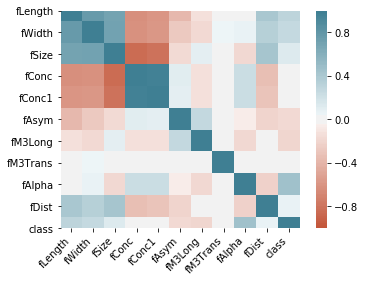

In [10]:
corr = data.corr()
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Here we can see fAlpha has the highest correlation with our target class while certain predictors also have a negative correlation

In [11]:
data.corr()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466,0.307572
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816,0.265596
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041,0.117795
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332,-0.024615
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625,-0.004797
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730,-0.173587
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025,-0.193409
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427,0.003837
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556,0.460979
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000,0.065203


*From the correlation graph we can seee that 'fLength', 'fWidth', and 'fsize' are highly collinear.* *This is not good while modeling data therfore we will not include 'fwidth'and'fsize' in our selected predictors as it could lead to inaccuracies*

We are predicting the class and whether it classifies as 'g'(0) or 'h' (1). Therfore we must remove the rows which have a negative correlation to class as they would not help in predicting the class.

In [12]:
df = data.drop(['fConc', 'fConc1', 'fAsym','fM3Long'], axis = 1, inplace = True)


In [13]:
data.head()

,fLength,fWidth,fSize,fM3Trans,fAlpha,fDist,class
0,22.9140,12.8643,2.2945,-5.0976,16.4346,204.9950,0
1,207.5245,106.8183,4.1841,-49.1582,0.4183,284.4439,1
2,12.9520,11.2497,2.0774,-10.9874,42.6363,183.2130,0
3,19.2995,10.6247,2.3118,7.2858,37.2878,130.0250,0
4,23.9210,0.0000,2.0663,0.0000,14.4070,104.4210,0


The columns above are only those with a positive correlation with the target column 'class'

#### We will now divide the data into an 80-20 split to train and test 

In [155]:
from sklearn.model_selection import train_test_split
x = data[['fLength','fM3Trans','fAlpha','fDist']] #the predictor variables
y = data['class'] # the target variable


In [156]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0) 

We will be using this training and testing data for all 3 of our models.

# Decision Tree and Random Forest

In [157]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel

C:\Users\shaun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shaun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


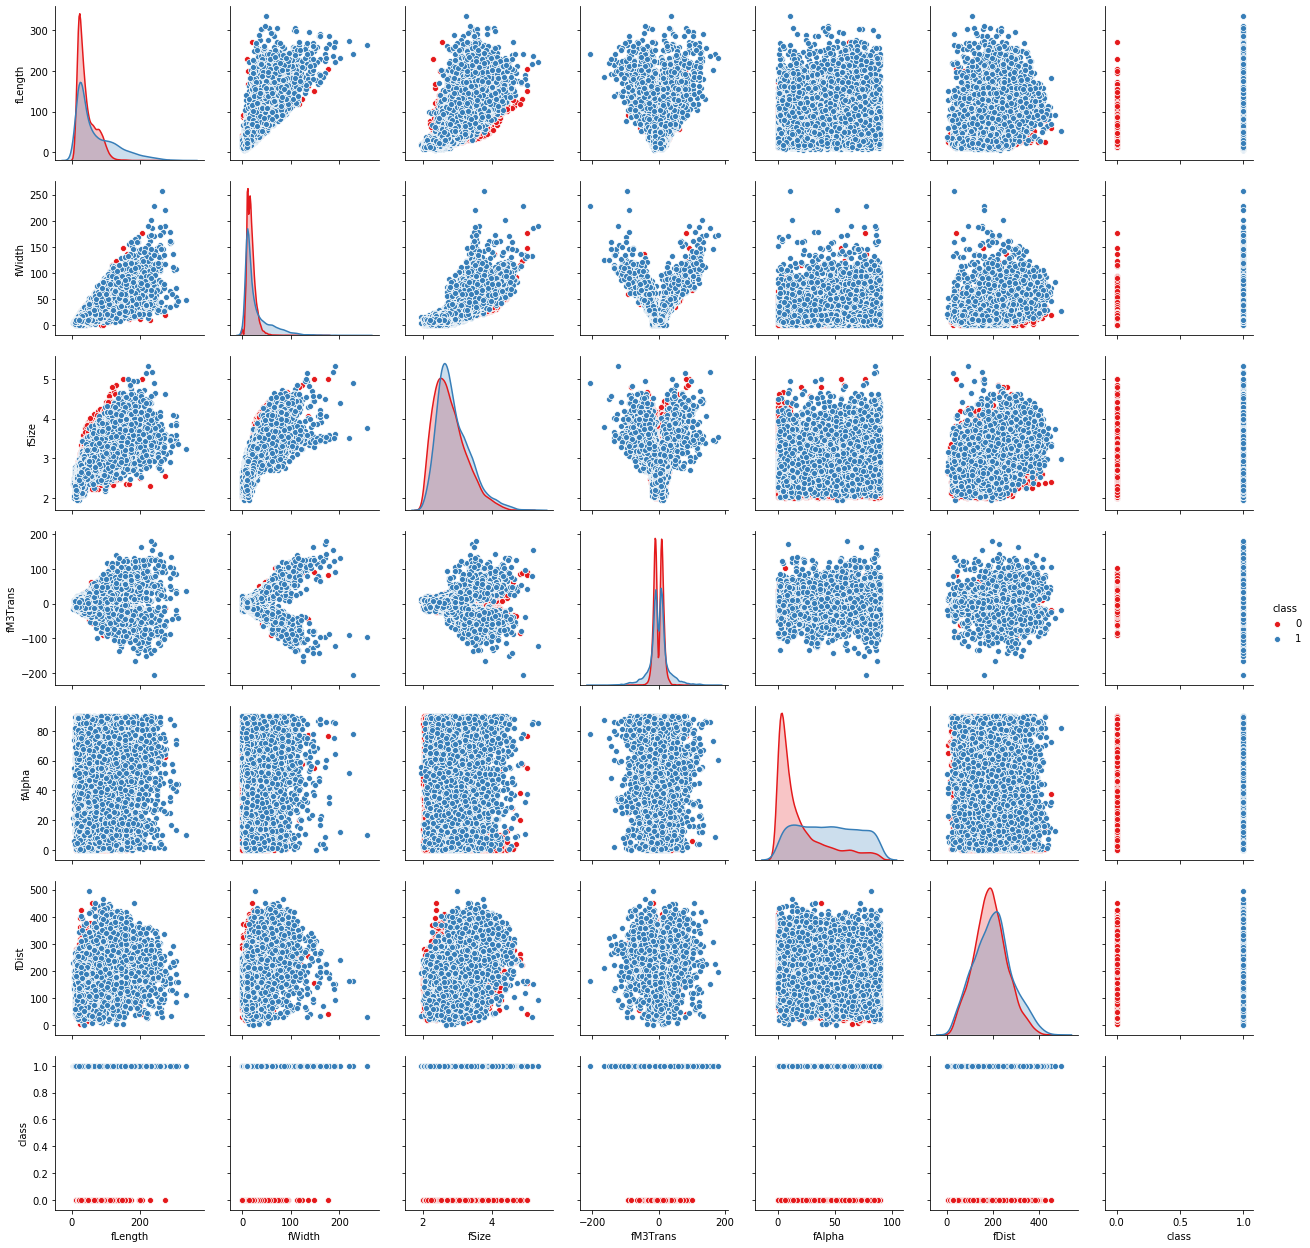

In [158]:
sns.pairplot(data,hue='class',palette='Set1')

In [217]:
dtree = DecisionTreeClassifier() 
dtree.fit(xTrain,yTrain) #fitting the decision tree on our training data 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [200]:
predictions = dtree.predict(xTest) #we run predictions on the test data

In [162]:
print(confusion_matrix(yTest,predictions))
print('\n')
print(classification_report(yTest,predictions))

[[1978  494]
 [ 421  911]]


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2472
           1       0.65      0.68      0.67      1332

    accuracy                           0.76      3804
   macro avg       0.74      0.74      0.74      3804
weighted avg       0.76      0.76      0.76      3804



For decision tree the overall accuracy is 76%

In [163]:
# Now running Random forest
rfc=RandomForestClassifier(n_estimators=200)
#n_estimators is the number of trees in the random forest. 
#This is a hyper-parameter and i've selected 200 as it gives a decent level of accuracy without going overboard.


In [164]:
model = SelectFromModel(clf, prefit=True)

In [165]:
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(xTrain,yTrain)

y_pred=rfc.predict(xTest)

In [166]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, y_pred))

Accuracy: 0.8283385909568874


In [167]:
print(confusion_matrix(yTest,y_pred))
print('\n')
print(classification_report(yTest,y_pred))

[[2262  210]
 [ 443  889]]


              precision    recall  f1-score   support

           0       0.84      0.92      0.87      2472
           1       0.81      0.67      0.73      1332

    accuracy                           0.83      3804
   macro avg       0.82      0.79      0.80      3804
weighted avg       0.83      0.83      0.82      3804



By comparing decison tree with random forrest we can tell that Random forest performs better in all aspects.

# Logistic regression

In [168]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [169]:
lr = LogisticRegression()
lr.fit(xTrain, yTrain)

C:\Users\shaun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.02356796 -0.00082384  0.04932852  0.00143998]]
[-3.58423871]


In [171]:
y_pred = lr.predict(xTest)

In [172]:
confusion_matrix(yTest, y_pred)

array([[2217,  255],
       [ 563,  769]], dtype=int64)

By creating a confusion matrix we can see how accurate the data is on the test dataset.Accuracy can be calacuated by seeing how often the model has accurately guesssed a 'true positive' or a 'false negative'. The number of true positives is 2214 and the number of false negatives is 774. This means the accuracy as we'll later see for the test data is 78.54%

In [173]:
lr.predict_proba(xTest) #gives the probability estimates for all values

array([[0.81229089, 0.18770911],
       [0.15073443, 0.84926557],
       [0.32666419, 0.67333581],
       ...,
       [0.83152486, 0.16847514],
       [0.84582989, 0.15417011],
       [0.9236902 , 0.0763098 ]])

In [174]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler() # standard scaler used to reduce the variable size
xTrain = scaler.fit_transform(xTrain) #this transforms it onto the inedpendent variables i.e the test data

In [177]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(xTrain, yTrain)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [178]:
xTest = scaler.transform(xTest)

In [179]:
y_pred = model.predict(xTest)

In [180]:
model.score(xTrain, yTrain)

0.7939668769716088

 On a training set the model is able to accurately guess the class 79% of the time.

In [181]:
model.score(xTest, yTest)

0.7849631966351209

The accuracy is seen to reduce on slightly when checking with the test data. This means the data is not being overfitted

# KNN 

Groups values by looking at the points closest to it and the distance between each feature. Requires values to be scaled and trasnformed to reduce distance. This has already been done for logistic regression therefore we'll be using the same x,y train-test-split. 

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
knn = KNeighborsClassifier(n_neighbors=1) #initially testing for k=1 

In [184]:
knn.fit(xTrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [185]:
pred = knn.predict(xTest)


In [186]:
print(confusion_matrix(yTest,pred))

[[2045  427]
 [ 455  877]]


In [187]:
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2472
           1       0.67      0.66      0.67      1332

    accuracy                           0.77      3804
   macro avg       0.75      0.74      0.74      3804
weighted avg       0.77      0.77      0.77      3804



In [188]:
# Choosing a k-value
error_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xTrain,yTrain)
    pred_i = knn.predict(xTest)
    error_rate.append(np.mean(pred_i != yTest)) #gives average error rate where average of predictions wasnt equal to test values 

Text(0, 0.5, 'Error Rate')

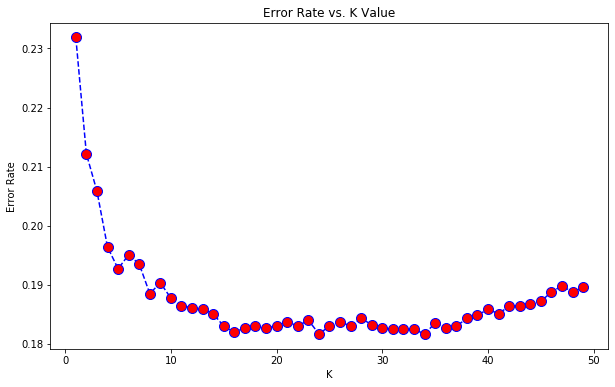

In [189]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph we can see between k value of 15 and 35 we get the lowest error rate. The error rate is the highest for k= 1 to 10.

In [190]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(xTrain,yTrain)
pred = knn.predict(xTest)

print('WITH K=1')
print('\n')
print(confusion_matrix(yTest,pred))
print('\n')
print(classification_report(yTest,pred))

WITH K=1


[[2045  427]
 [ 455  877]]


              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2472
           1       0.67      0.66      0.67      1332

    accuracy                           0.77      3804
   macro avg       0.75      0.74      0.74      3804
weighted avg       0.77      0.77      0.77      3804



In [191]:
# Taking lowest error which is k=24
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(xTrain,yTrain)
pred = knn.predict(xTest)

print('WITH K=1')
print('\n')
print(confusion_matrix(yTest,pred))
print('\n')
print(classification_report(yTest,pred))

WITH K=1


[[2336  136]
 [ 555  777]]


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2472
           1       0.85      0.58      0.69      1332

    accuracy                           0.82      3804
   macro avg       0.83      0.76      0.78      3804
weighted avg       0.82      0.82      0.81      3804



We can therfore see as the k value was made 24 the accuracy of the entire model increased.

### Answers to listed Questions

1) Is the relationship significant? 
   
This is a binary classification dataset therefore the models being used were selected accordingly. Logistic regression was   used as it is a classification method but has low bias therfore we can see it performing the worst among the models.
Next we used RandomForest as it would give a more accurate prediction and doesnt overfit. 
K- nearest neigbors was also used as I removed most of the predictor variables therefore the dimensionality was relatively less. The dataset was also not too large.

2) Are any model assumptions violated?

No model assumptions were iolated here as the models performed as expected in classifying the data into binary classes pf 'g' and 'h'

3) Is there any mulit-collinearity in the model?

Yes multi-collinearity existed in the model therefore the predictors which were highly correlated with one another. fLength, fWidth, and fSize were highly correlated features, therfore only fLength was included as a feature and the other two columns werent used in predicting. 
This reuslted in a slight drop in accuracy when comparing to when these features were included as predictors. Therefore i chose to train and test the data without these predictors as it did not greatly affect the accuracy of the models.

4) In the multivariate models are predictor variables independent of all the other predictor variables?

Some predictor variables are completely independent of all other predictors while others were selected only if they had a very low correlation with other predicotrs and high correlation with the target class.

5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

A correlation matrix was created to find which variables were most significant with regard tot he target variable. The columns with a negative correlation were not selected as predictors. The correlation table also shows which perdictors have the highest correlation with the target class and these features were only selected for models. 

6) Does the model make sense?

The models selected were all slected as per the dataset and performed as per expectations.

RandomForest: This model was selceted as random forests are very efficient when it comes to classification and the resulting accuracy proves this.

Logistic Regression: Logistic regression is most effectie when applying it to binary classfication datasets and was therefore selcted. It fetched decent accuracy as well.

KNN: The predictor variables were reduced to 4 as well as the dataset wasnt too large, for these reasons KNN was selcted as the third model and performed well fetching a high accuracy.

7) Does regularization help?

Regularisation is used to aoid the problem of overfitting a dataset. In the case of this dataset the datset itself was divided into a train and test set to avoid over training the data.

The dataset selected was for binary classification therefore the scope for regularisation was also less. The models used also have inbuilt regularisation. The models also did not overfit the data therfore regularisation wouldnt cause much of a differnce to the accuracy.

8) Which independent variables are significant?

As the dataset is a classification one, and not regression, the significance of the variables can't be calculated using p-values or other metrics,  but instead by checking correlation. The columns with a positive correlation were therfore selcted and those with a negative correlation were dropped.

9) Which hyperparameters are important?

Random Forest: Here n_indicators was important and through trial and errror i chose a value of 200 as this wouldnt create to many nodes but still give good accuracy.

Logistic Regression: The hyperparameters selected were the standard ones as they gave a decent value when run and di not overfit the data.

KNN: Here the value of k was plotted with respect to the error. The value with the least error as selected for k and this gave the best accuracy for the model.



# Conclusion

The goal was to see if the predictor variables could be used to predict the target class. This was successfully achieved with decent levels of accuracy. We had to reduce the number of predictor variables to get a more accurate outcome for each of the models while splitting the dataset into train and test. 

If we compare all 3 models we realise that RandomForest has the highest accuracy, followed by KNN, and in last we have logistic regression. RandomForest has the highest accuracy as it classifies using bootstrap samples from the orginal dataset. It also tends to not overfit like in the case of decision trees.


## References

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://www.bitdegree.org/learn/train-test-split

https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

https://matplotlib.org/

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

Copyright 2020 Shaunak Prabhu 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.